# 12. час: Модификације табеле и записивање табеле у датотеку

На овом часу ћемо говорити о:
1. додавању нове врсте или колоне табели; и
2. записивању табеле у датотеку.

## 12.1. Додавање нове врсте или колоне табели

Понекад је важно да вредности које смо израчунали на основу података у табели (на пример, просеке оцена по ученицима) и сачувамо у табели. Ако табела нема за то предвиђену колону или врсту лако је можемо додати!

Вратимо се поново на пример са оценама ученика кога смо видели на раније:

In [1]:
import pandas as pd
razred = [["Ана",     5, 3, 5, 2, 4, 5],
          ["Бојан",   5, 5, 5, 5, 5, 5],
          ["Влада",   4, 5, 3, 4, 5, 4],
          ["Гордана", 5, 5, 5, 5, 5, 5],
          ["Дејан",   3, 4, 2, 3, 3, 4],
          ["Ђорђе",   4, 5, 3, 4, 5, 4],
          ["Елена",   3, 3, 3, 4, 2, 3],
          ["Жаклина", 5, 5, 4, 5, 4, 5],
          ["Зоран",   4, 5, 4, 4, 3, 5],
          ["Ивана",   2, 2, 2, 2, 2, 5],
          ["Јасна",   3, 4, 5, 4, 5, 5]]
ocene = pd.DataFrame(razred)
ocene.columns=["Име", "Српски", "Енглески", "Математика", "Физика", "Хемија", "Ликовно"]
ocene1 = ocene.set_index("Име")
ocene1

,Српски,Енглески,Математика,Физика,Хемија,Ликовно
Име,,,,,,
Ана,5,3,5,2,4,5
Бојан,5,5,5,5,5,5
Влада,4,5,3,4,5,4
Гордана,5,5,5,5,5,5
Дејан,3,4,2,3,3,4
Ђорђе,4,5,3,4,5,4
Елена,3,3,3,4,2,3
Жаклина,5,5,4,5,4,5
Зоран,4,5,4,4,3,5


Овде смо прво увезли библиотеку _pandas_ са скраћеним именом "pd", од листе података смо направили табелу, дали колонама имена и индексирали смо табелу по имену ученика.

Као што смо раније видели, лако можемо да израчунамо просек оцена сваког ученика и да те податке испишемо. Међутим, ако желимо да просеке запамтимо у табели, треба нам нова колона. Нова колона се табели додаје тако што се просто напише:

In [2]:
ocene1["ПросекУч"] = 0.0

Ако покушамо да непостојећој колони додамо неку вредност, систем ће сам на крај табеле додати нову колону и попунити је наведеним вредностима:

In [3]:
ocene1

,Српски,Енглески,Математика,Физика,Хемија,Ликовно,ПросекУч
Име,,,,,,,
Ана,5,3,5,2,4,5,0.0
Бојан,5,5,5,5,5,5,0.0
Влада,4,5,3,4,5,4,0.0
Гордана,5,5,5,5,5,5,0.0
Дејан,3,4,2,3,3,4,0.0
Ђорђе,4,5,3,4,5,4,0.0
Елена,3,3,3,4,2,3,0.0
Жаклина,5,5,4,5,4,5,0.0
Зоран,4,5,4,4,3,5,0.0


Сада ћемо у једном _for_-циклусу да прођемо кроз индексну колону табеле и да за сваки ред табеле израчунамо просек бројева уписаних у колоне "Српски"--"Ликовно". (Не смемо да рачунамо просек целог реда, јер редови сада садрже и колону "ПросекУч" која не сме да се укључи у рачун просека!)

In [4]:
for ucenik in ocene1.index:
    ocene1.loc[ucenik, "ПросекУч"] = ocene1.loc[ucenik, "Српски":"Ликовно"].mean()

Ево како изгледа нова табела:

In [5]:
ocene1

,Српски,Енглески,Математика,Физика,Хемија,Ликовно,ПросекУч
Име,,,,,,,
Ана,5,3,5,2,4,5,4.000000
Бојан,5,5,5,5,5,5,5.000000
Влада,4,5,3,4,5,4,4.166667
Гордана,5,5,5,5,5,5,5.000000
Дејан,3,4,2,3,3,4,3.166667
Ђорђе,4,5,3,4,5,4,4.166667
Елена,3,3,3,4,2,3,3.000000
Жаклина,5,5,4,5,4,5,4.666667
Зоран,4,5,4,4,3,5,4.166667


Да бисмо израчунали просечну оцену за сваки предмет, додаћемо нову врсту:

In [6]:
ocene1.loc["ПросекПр"] = 0.0
ocene1

,Српски,Енглески,Математика,Физика,Хемија,Ликовно,ПросекУч
Име,,,,,,,
Ана,5.0,3.0,5.0,2.0,4.0,5.0,4.000000
Бојан,5.0,5.0,5.0,5.0,5.0,5.0,5.000000
Влада,4.0,5.0,3.0,4.0,5.0,4.0,4.166667
Гордана,5.0,5.0,5.0,5.0,5.0,5.0,5.000000
Дејан,3.0,4.0,2.0,3.0,3.0,4.0,3.166667
Ђорђе,4.0,5.0,3.0,4.0,5.0,4.0,4.166667
Елена,3.0,3.0,3.0,4.0,2.0,3.0,3.000000
Жаклина,5.0,5.0,4.0,5.0,4.0,5.0,4.666667
Зоран,4.0,5.0,4.0,4.0,3.0,5.0,4.166667


Овде треба да застанемо за тренутак и да се подсетимо да се запис облика `ocene1["ПросекУч"]` односи на колоне табеле тако да ће наредба

    ocene1["ПросекУч"] = 0.0

додати нову колону попуњену нулама, док се запис `ocene1.loc["ПросекПр"]` односи на врсте табеле, па ће наредба

    ocene1.loc["ПросекПр"] = 0.0

додати нову врсту попуњену нулама (што се и десило у примеру).



In [7]:
for predmet in ocene1.columns:
    ocene1.loc["ПросекПр", predmet] = ocene1.loc["Ана":"Јасна", predmet].mean()
ocene1

,Српски,Енглески,Математика,Физика,Хемија,Ликовно,ПросекУч
Име,,,,,,,
Ана,5.000000,3.000000,5.000000,2.000000,4.000000,5.000000,4.000000
Бојан,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
Влада,4.000000,5.000000,3.000000,4.000000,5.000000,4.000000,4.166667
Гордана,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
Дејан,3.000000,4.000000,2.000000,3.000000,3.000000,4.000000,3.166667
Ђорђе,4.000000,5.000000,3.000000,4.000000,5.000000,4.000000,4.166667
Елена,3.000000,3.000000,3.000000,4.000000,2.000000,3.000000,3.000000
Жаклина,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.666667
Зоран,4.000000,5.000000,4.000000,4.000000,3.000000,5.000000,4.166667


Ево још једног примера. У фолдеру _podaci_ се налази датотека _StanovnistvoSrbije2017.csv_ која садржи процену броја становника Републике Србије по годинама на дан 31.12.2017. Први ред табеле представља заглавље табеле које нам каже да табела има три колоне (Старост, Мушко, Женско). Прво ћемо учитати табелу и индексирати је колоном "Старост":

In [8]:
stanovnistvo = pd.read_csv("podaci/StanovnistvoSrbije2017.csv")
stanovnistvo1 = stanovnistvo.set_index("Старост")

Сада ћемо урадити малу демографску анализу: израчунаћемо однос броја мушкараца и жена по годинама старости и приказаћемо податке линијским дијаграмом.

Прво ћемо табели додати нову колону "М/Ж" и у ту колону уписати израчунате односе:

In [9]:
stanovnistvo1["М/Ж"] = 0.0
for i in stanovnistvo1.index:
    stanovnistvo1.loc[i, "М/Ж"] = stanovnistvo1.loc[i, "Мушко"] / stanovnistvo1.loc[i, "Женско"]

Ево првих неколико редова табеле:

In [11]:
stanovnistvo1.head(10)

,Мушко,Женско,М/Ж
Старост,,,
0,33145,31444,1.054096
1,33252,31105,1.069024
2,33807,31475,1.074091
3,34076,31952,1.066475
4,33436,31643,1.056663
5,34278,32505,1.054545
6,33773,31523,1.071376
7,33892,32185,1.053037
8,34706,32396,1.071305


Потом ћемо приказати дијаграм коме ћемо додати линију на висини 1.0 да бисмо лакше уочили у ком тренутку број мушкараца постаје мањи од броја жена:

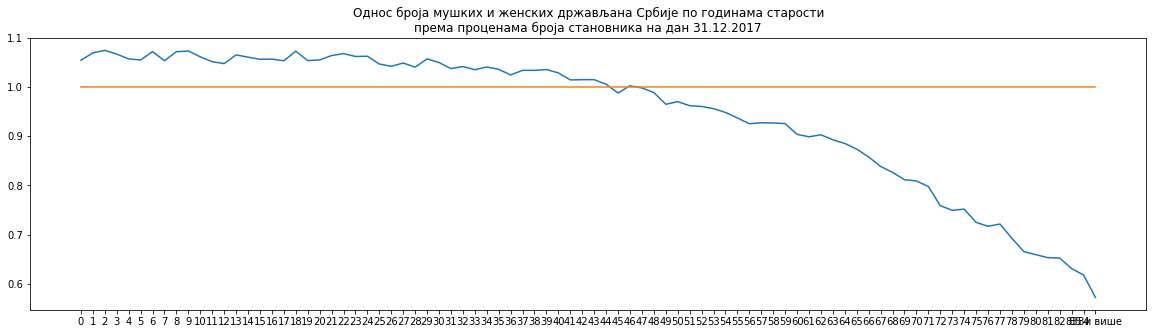

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(stanovnistvo1.index, stanovnistvo1["М/Ж"])
plt.plot(stanovnistvo1.index, [1.0] * len(stanovnistvo1.index))
plt.title("Однос броја мушких и женских држављана Србије по годинама старости\nпрема проценама броја становника на дан 31.12.2017")
plt.show()
plt.close()

## 12.2. Записивање табеле у датотеку

Веома је важно омогућити да се подаци који су учитани из неке датотеке могу, након обраде, поново уписати у датотеку. Да ова могућност не постоји морали бисмо сваки пут изнова вршити обраду података, што у неким случајевима може да буде веома дуготрајан посао.

Табела се уписује у датотеку типа _CSV_ позивом функције `to_csv` (енгл. "у csv"). На пример, табелу `stanovnistvo1` смо модификовали тако што смо јој додали нову колону у коју смо уписали однос броја мушкараца и жена по узрастима. Ако желимо да тако модификовану табелу сачувамо под новим именом, то можемо учинити овако:

In [13]:
stanovnistvo1.to_csv("podaci/StanovnistvoSrbije2017-Novo.csv", encoding="utf-8")

Први податак који се прослеђује функцији `to_csv` представља име нове датотеке у коју ће бити уписани подаци, док аргумент `encoding="utf-8"` значи да ће подаци бити уписани у датотеку користећи систем за кодирање који се зове _UTF-8_. Ово морамо да наведемо зато што у табели имамо податке који су записани ћирилицом. Чак и да смо користили латиницу морали бисмо да користимо UTF-8 систем за кодирање због слова као што су č, ć, š, ž, đ, а која не постоје у енглеском алфабету. Аргумент `encoding="utf-8"` можемо да изоставимо само ако знамо да су за записивање података у табели коришћени искључиво симболи из енглеског алфабета.

Ево примера. Са линка

    https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv

ћемо учитати списак држава на свету и записаћемо ту табелу (без икаквих трансформација) у локалну датотеку _drzavesveta.csv_ у фолдеру _podaci_:

In [14]:
drzave = pd.read_csv("https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv")
drzave.to_csv("podaci/drzavesveta.csv")

Ако сада из неког програма за уређивање текста (рецимо, _Notepad_) погледамо датотеку коју смо добили записивањем, видећемо да она изгледа овако (наведено је само првих неколико редова):

    ,Country,Region
    0,Algeria,AFRICA
    1,Angola,AFRICA
    2,Benin,AFRICA
    3,Botswana,AFRICA
    4,Burkina,AFRICA
    5,Burundi,AFRICA
    6,Cameroon,AFRICA
    7,Cape Verde,AFRICA
    8,Central African Republic,AFRICA
    9,Chad,AFRICA
    (итд)

Приликом уписивања података у табелу Пајтон је уписао и индексну колону. Код табеле `stanovnistvo1` нам је то одговарало јер је табела била индексирана колоном "Старост". Овде нам то, ипак, не одговара зато што индексна колона не даје никакву важну информацију о подацима у табели. Ако желимо да упижемо табелу у датотеку, али тако да се индексна колона не уписује, можемо то урадити овако:

In [15]:
drzave.to_csv("podaci/drzavesveta.csv", index=False)

Сада у датотеци пише:

    Country,Region
    Algeria,AFRICA
    Angola,AFRICA
    Benin,AFRICA
    Botswana,AFRICA
    Burkina,AFRICA
    Burundi,AFRICA
    Cameroon,AFRICA
    Cape Verde,AFRICA
    Central African Republic,AFRICA
    Chad,AFRICA
    (итд)

што смо и желели.

## 12.3. Задаци

Задатке реши у Џупајтеру.

**Задатак 1.** Биолози су до данас описали око два милиона врста живих бића. Сва она су подељена у пет царстава. Њихов приближан број по царствима је дат следећом табелом:

| Царство  | Број врста |
|--|--|
| Животиње | 1.400.000 |
| Биљке    | 290.000 |
| Гљиве    | 100.000 |
| Протисти | 200.000 |
| Монере   | 10.000 |

Додај нову врсту табели која се зове "Укупно" и у њу унеси укупан број врста. Немој рачунати ручно, већ примени функцију `sum` на одговарајућу колону табеле.

**Задатак 2.** У наредној ћелији дати су подаци о тежини (у килограмима) и дужини/висини (у центиметрима) једног дечака од његовог шестог месеца па до његових 6,5 година. Прикажи ове податке графиконом.

In [ ]:
# изврши ову ћелију
merenja   = ["6 мес", "1,5 год", "2,5 год", "3,5 год", "4,5 год", "5,5 год", "6,5 год"]
masaKG    = [5.9,     11.5,      14.8,      20.5,      22.0,      24.2,      29.0     ]
visinaCM  = [62.0,    84.0,      97.0,      115.0,     122.5,     131.5,     135.0    ]

Транспонуј табелу, тако транспонобаној табели додај нову колону, па за свако мерење (што је сада врста у новој, транспонованој табели) израчунај _BMI_ (_body mass index_) по формули:

$$\hbox{BMI} = \frac{\hbox{masa u kilogramima}}{(\hbox{visina u metrima})^2}$$

Добијену табелу упиши у датотеку _BMI.csv_ (обрати пажњу на то да у табели имаш податке записане ћирилицом).

**Задатак 3.** У следећој табели су приказане највише и најниже температуре (у Целзијусима) икада измерене на континентима:

|Континент:              | Европа | Азија | Африка | Северна Америка | Јужна Америка | Аустралија | Антарктик |
|------------------------|--------|-------|--------|-----------------|---------------|------------|-----------|
|Највиша забележена темп:| 48     | 54    | 55     | 56.7            | 48.9          | 50.7       | 19.8      |
|Најнижа забележена темп:| -58.1  | -67.8 | -23.9  | -63             | -32.8         | -23        | -89.2     |

(Подаци су преузети са странице https://www.space.com/17816-earth-temperature.html). Додај нови ред овој табели па у њега упиши максимални температурни распон за сваки континент, који се добија када се од највише забележене температуре одузме најнижа забележена температура.

**Задатак 4.** У фолдеру _podaci_ се налази датотека _StanovnistvoSrbije2017.csv_ (која има заглавље). Табела има три колоне које се зову "Старост", "Мушко" и "Женско".

_(а)_ Учитај датотеку у структуру података _DataFrame_ и индексирај табелу колоном "Старост".

_(б)_ Додај табели нову колону "УкупноСт" и онда израчунај и у ту колону упиши податак о томе колики је укупан процењени број становника по старости. Прикажи укупан процењени број становника по старости линијским дијаграмом.

_(в)_ Додај табели нову врсту "УкупноПол" и онда израчунај и у ту врсту упиши податак о томе колики је укупан процењени број становника по полу. Прикажи укупан процењени број становника по полу секторским дијаграмом.

_(г)_ На овај начин измењену табелу сними у датотеку _podaci.csv_ (обрати пажњу на то да у табели имаш податке записане ћирилицом).